<img src="media/Cryo+ESA_Logo_plain-50gray.svg" alt="CCI Cryosphere banner" width="1000"/>

# Mapping the permafrost active layer thickness using Cate and the open data portal

The open data portal hosts three permafrost datasets  the open data portal you can find [permafrost active layer thickness](https://climate.esa.int/en/odp/#/project/permafrost). This exercise will show you how to download, visualize and process these.

## Preparations
If you haven't done so please follow the [Cate tutorial](futurelearn.com/tbd) to get started using the exercises.


In [1]:
# To get things started we need to initialize a few things
#Load some python modules to make them accessible to the notebook
from cate.core.ds import DATA_STORE_REGISTRY
import cate.ops as ops
from cate.util.monitor import ConsoleMonitor

#temporary hack to work around (https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop)
import nest_asyncio
nest_asyncio.apply()
# end temporary hack

monitor=ConsoleMonitor()

In [2]:
#initialize the online data store (In the background this class connects to the service at his connects to the site at https://catalogue.ceda.ac.uk)
data_store = DATA_STORE_REGISTRY.get_data_store('esa_cci_odp_os')

In [ ]:
# To get an idea of what is available in the online data portal one can query it and loop over it's result to print some information to the screen
permafqry=data_store.query(query_expr="permafrost")

for i,pfItem in enumerate(permafqry):
    print("\nDataset item %d:\nds_id: %s"%(i,pfItem.id))
    print(pfItem)

In [7]:
from datetime import datetime
# OK let's pick out a dataset:the Active layer thickness of the permafrost (bias corrected)
# The [0] at the end of the command means that we take the first item of the result list (we actually only expect one item)
pfalt=data_store.query("esacci.PERMAFROST.yr.L4.ALT.multi-sensor.multi-platform.ERA5_MODISLST_BIASCORRECTED.02-0.r1")[0]

permaALTDset=pfalt.open_dataset()

Text(0.5, 1.0, 'Permafrost active layer thickness in the Northern hemisphere')

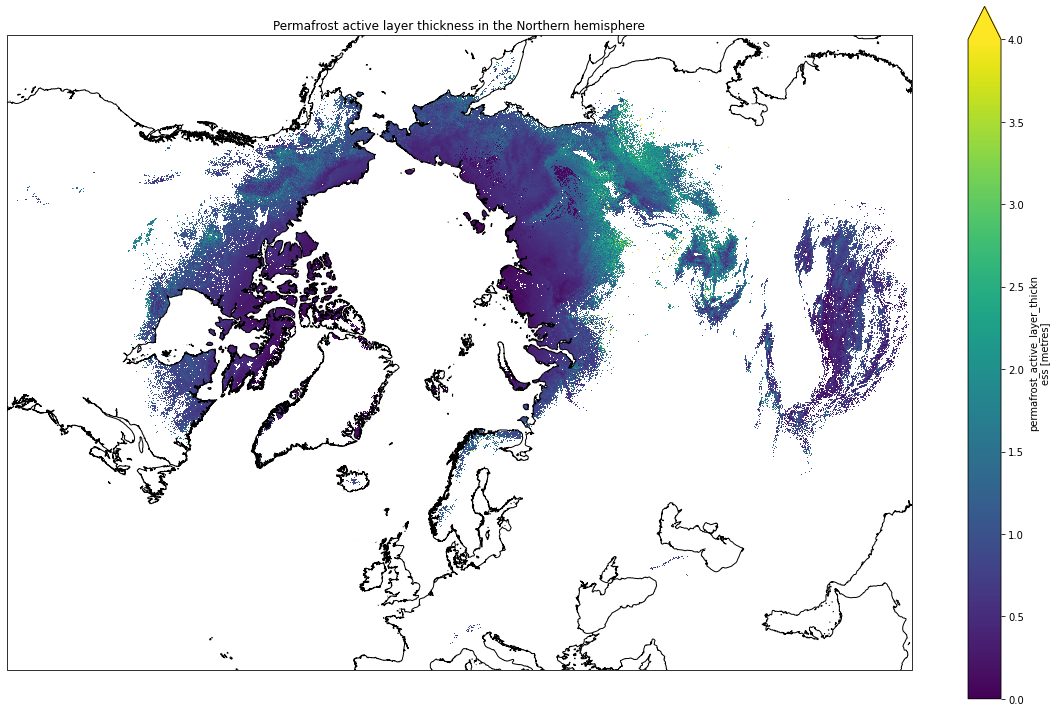

In [20]:
%matplotlib inline
import matplotlib.pyplot as mpl
import cartopy.crs as ccrs

it=0

mpl.figure(figsize=(16,10))
crs=ccrs.NorthPolarStereo(0,true_scale_latitude=71)

ax = mpl.subplot(projection=crs)
permaALTDset.ALT[it,:,:].plot.imshow(vmin=0,vmax=4,ax=ax)

ax.coastlines(resolution='10m')

ax.set_title("Permafrost active layer thickness in the Northern hemisphere")


## Questions
1. In general, higher latitudes are associated with a thinner active layer. How can you explain this?
2. Copy the plotting code in a new cell and try to make a plot of the change in active layer thickness (difference between last and first epoch). Make sure to choose a divergent colormap (e.g. seismic centered at a value of zero)
3. Is there a general decrease or increase of the active layer thickness? Would this be expected under a warming climate?